<a href="https://colab.research.google.com/github/RohanSaxena14/mask_vs_no-mask/blob/master/testing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat

In [0]:
import dlib
cnn_face_detector = dlib.cnn_face_detection_model_v1("/content/mmod_human_face_detector.dat")

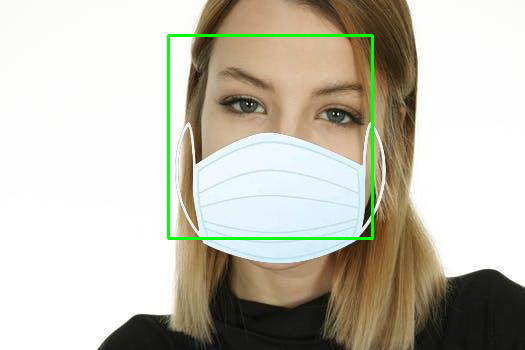

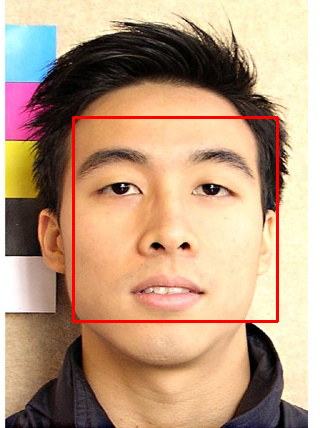

In [15]:
#FOR IMAGES

from google.colab.patches import cv2_imshow

image1 = cv2.imread("/content/1-with-mask.jpg")
image2 = cv2.imread("/content/15.jpg")

for image in [image1, image2]:

  faces = cnn_face_detector(image, 1) # Detecting faces using dlib

  for face in faces: # Looping on all detected faces

    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

    image1 = image[y : y+h, x : x+w] #cropping the image for passing in the model
    
    image1 = cv2.resize(image1, (300, 300)) #RESIZING THE IMAGE

    image1 = np.array(image1).reshape(-1, 300, 300, 3) #MAKING A TENSOR

    p = model.predict(image1)[0] #MAKING PREDICTIONS
    if p[0] == 0:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
      cv2_imshow(image)

    else:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)   
      cv2_imshow(image) 

In [0]:
#FOR VIDEO

cap = cv2.VideoCapture("file_location")

while cap.isOpened():
  _, image = cap.read()

  faces = cnn_face_detector(image, 1) # Detecting faces using dlib

  for face in faces: # Looping on all detected faces

    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

    image1 = image[y : y+h, x : x+w] #cropping the image for passing in the model
    
    image1 = cv2.resize(image1, (300, 300)) #RESIZING THE IMAGE

    image1 = np.array(image1).reshape(-1, 300, 300, 3) #MAKING A TENSOR

    p = model.predict(image1)[0] #MAKING PREDICTIONS
    if p[0] == 0:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
      cv2_imshow(image)

    else:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)   
      cv2_imshow(image)